# Tratamiento final de  los textos
# Bitacora 3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist
import inflection
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
nlp = English()

In [2]:
#======================== Funciones Necesarias ===================================#
# Eliminar caracteres no alfabeticos
regex = re.compile('[^A-Za-z]')
def texClean1(x,rg): return rg.sub(' ',str(x))
# Eliminar palabras vacias
def texClean2(x):
    my_doc = nlp(str(x))
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    filtered_sentence =[]
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return ' '.join(filtered_sentence)
# Poner todo en Singular
def SingTex(x):
    sentence = str(x).split()
    text = [inflection.singularize(wrd) for wrd in sentence]
    result = ' '.join(text)
    return result
# Eliminar palabras segun diccionario
Dic1 = pd.read_csv('palabras1.csv', engine='python',sep=",")
Dic1 = np.array(Dic1[Dic1.Ind.isnull()].word)

Dic2 = pd.read_csv('palabras2.csv', engine='python',sep="\t")
Dic2 = np.array(Dic2[Dic2.Ind.isnull()].word)

def texClean3(x,DIC):
    x = str(x)
    querywords = x.split()
    resultwords  = [word for word in querywords if word.lower() not in DIC]
    result = ' '.join(resultwords)
    return result
# longitud de un texto
def LENW(x):return len(tknzr.tokenize(str(x)))
## Tratamiento completo de el texto
def TratTex(x):
    text = str(x).lower()
    text = texClean1(text,regex)
    text = texClean2(text)
    text = SingTex(text)
    text = texClean3(text,Dic1)
    text = texClean3(text,Dic2)
    return text

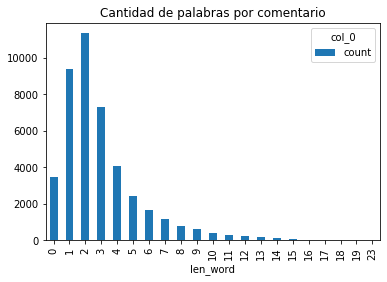

In [3]:
# Lectura de los datos --------------------------------------------------------#
data = pd.read_csv('datos_finales.csv', engine='python',sep="|")
# Tratamiento de el texto -----------------------------------------------------#
data_F = data.assign(caption = data.caption.map(lambda p: TratTex(p)))
# Eliminacion de Textos sin contenido -----------------------------------------#
data_F = data_F.assign(len_word = data_F.caption.map(LENW))
pd.crosstab(data_F.len_word, columns='count').plot.bar()
plt.title("Cantidad de palabras por comentario")
plt.show()
data_F = data_F[data_F.len_word != 0]

In [4]:
#Creaccion de diccionario de palabras---------------------------------------------#
def NGRAM(x,n):
    token=nltk.word_tokenize(str(x))
    bigrams=ngrams(token,n)
    return list(bigrams)
def Table_NGRAM(data,n):
    n_grams = data.caption.map(lambda p: NGRAM(p,n))
    n_grams = sum(n_grams,[])
    table_n = pd.DataFrame(FreqDist(n_grams), index =[0]).T
    table_n.columns = ['Count']
    table_n = table_n.sort_values('Count', ascending = False)
    return table_n

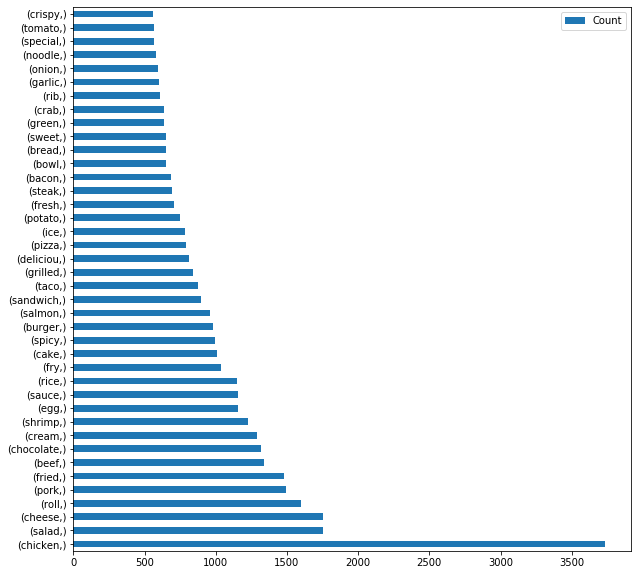

In [8]:
# n-gramss n = 1 ..............................................................#
table_n1 = Table_NGRAM(data_F,1)
plt.rcParams['figure.figsize'] = [10, 10]
table_n1[:40].plot.barh()

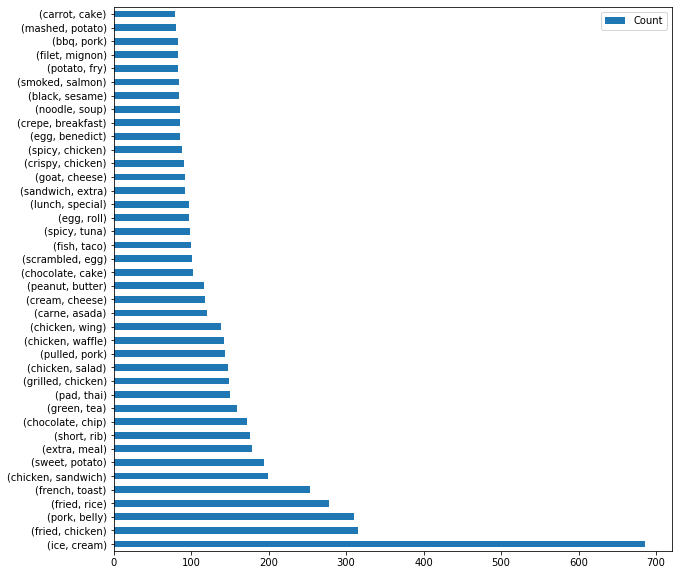

In [9]:
table_n2 = Table_NGRAM(data_F,2)
plt.rcParams['figure.figsize'] = [10, 10]
table_n2[:40].plot.barh()

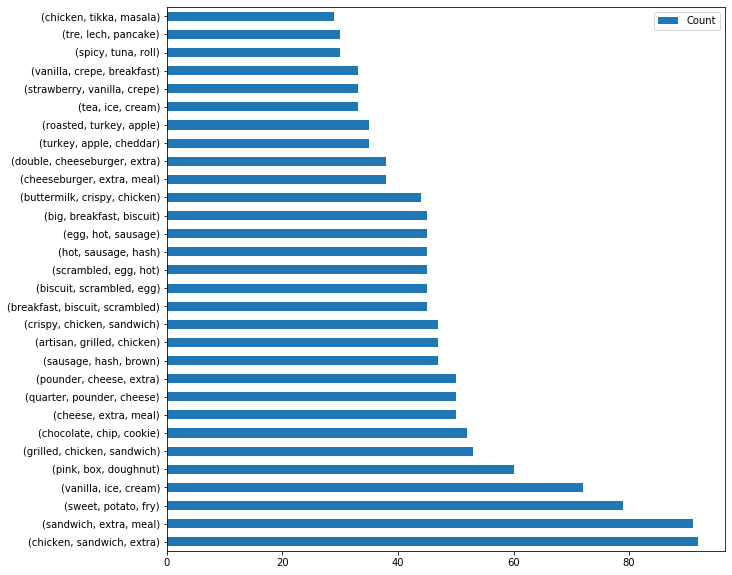

In [10]:
table_n3 = Table_NGRAM(data_F,3)
plt.rcParams['figure.figsize'] = [10, 10]
table_n3[:30].plot.barh()

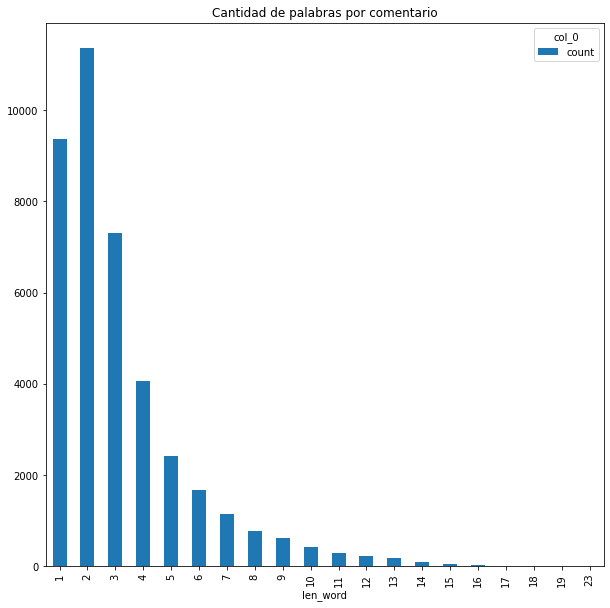

In [11]:
data_F = data_F.assign(len_word = data_F.caption.map(LENW))
pd.crosstab(data_F.len_word, columns='count').plot.bar()
plt.title("Cantidad de palabras por comentario")
plt.show()
data_F = data_F[data_F.len_word != 0]

In [14]:
data_F[data_F.len_word > 20].caption

12376    thai tea cake thai tea cream sauce honey toast...
Name: caption, dtype: object

In [16]:
data_F[data_F.len_word == 6].caption

1               yummy tart guava salted caramel coffee
7          californium style burger italian beef combo
35             chicken burrito mild sauce hot deliciou
38                   white vega roll rainbow roll roll
47              noodle minced pork noodle peking sauce
                             ...                      
43351           meal peach caprese trout steak dessert
43368        egg sausage buttermilk biscuit hash brown
43399           fresh baked pretzel love dipping sauce
43407    chicken fajitum nacho pretzel bun cheesesteak
43427           santum chicken wrap home tortilla chip
Name: caption, Length: 1660, dtype: object

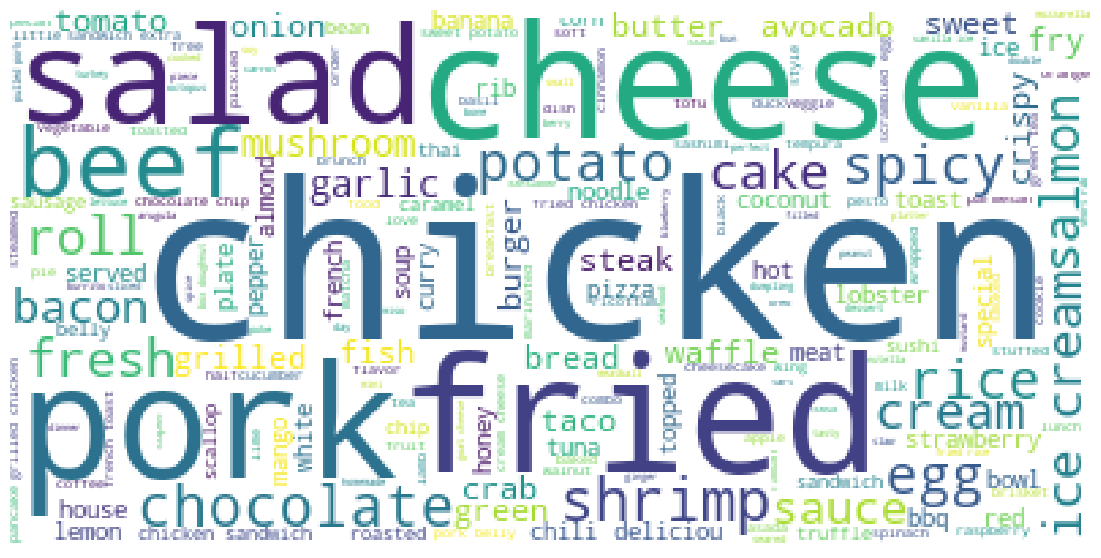

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=450,background_color="white").generate(data_F.caption.sum())
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
